In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
# /home/u55hy/Documents/Research/safe-drive-fed-inc/safe-drive-fed-inc/runs/detect/init_fed1_fine_tune_client1/results.csv
base_path = os.path.join(os.getcwd())

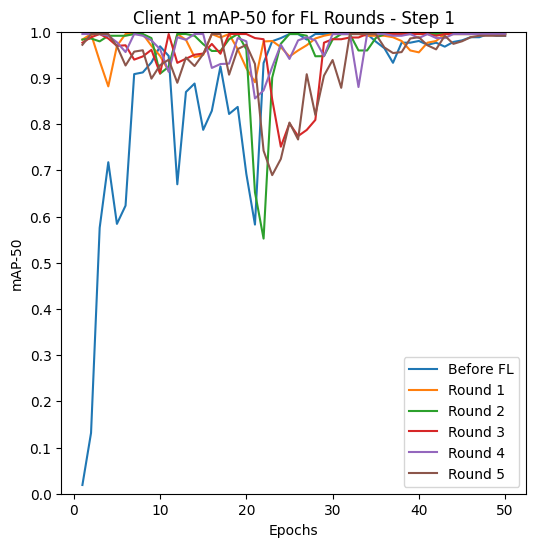

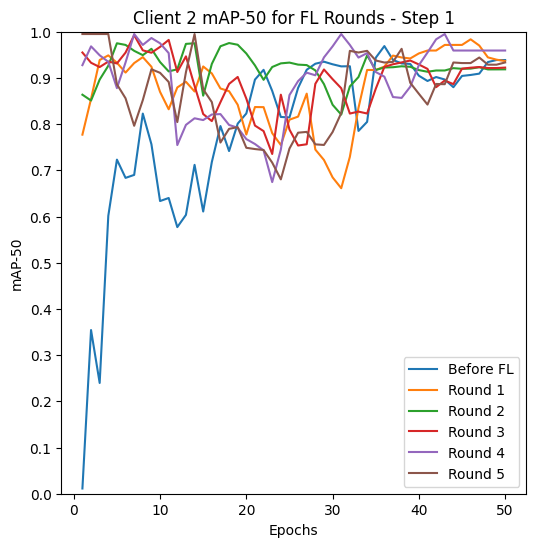

In [75]:
for i in range(1, 3):
    no_fed = pd.read_csv(base_path + f'/runs/detect/init_fine_tune_client{i}/results.csv')
    fed_1 = pd.read_csv(base_path + f'/runs/detect/init_fed1_fine_tune_client{i}/results.csv')
    fed_2 = pd.read_csv(base_path + f'/runs/detect/init_fed12_fine_tune_client{i}/results.csv')
    fed_3 = pd.read_csv(base_path + f'/runs/detect/init_fed123_fine_tune_client{i}/results.csv')
    fed_4 = pd.read_csv(base_path + f'/runs/detect/init_fed1234_fine_tune_client{i}/results.csv')
    fed_5 = pd.read_csv(base_path + f'/runs/detect/init_fed12345_fine_tune_client{i}/results.csv')

    epochs = fed_1['                  epoch']
    map_0 = no_fed['       metrics/mAP50(B)']
    map_1 = fed_1['       metrics/mAP50(B)']
    map_2 = fed_2['       metrics/mAP50(B)']
    map_3 = fed_3['       metrics/mAP50(B)']
    map_4 = fed_4['       metrics/mAP50(B)']
    map_5 = fed_5['       metrics/mAP50(B)']

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, map_0, label='Before FL')
    plt.plot(epochs, map_1, label='Round 1')
    plt.plot(epochs, map_2, label='Round 2')
    plt.plot(epochs, map_3, label='Round 3')
    plt.plot(epochs, map_4, label='Round 4')
    plt.plot(epochs, map_5, label='Round 5')

    plt.title(f'Client {i} mAP-50 for FL Rounds - Step 1')
    plt.xlabel('Epochs')
    plt.ylabel('mAP-50')
    plt.legend(loc='lower right')
    plt.ylim(0, 1)
    plt.yticks([i * 0.1 for i in range(11)])
    # plt.show()
    plt.savefig(base_path + f'/plots/init_client{i}.jpg')

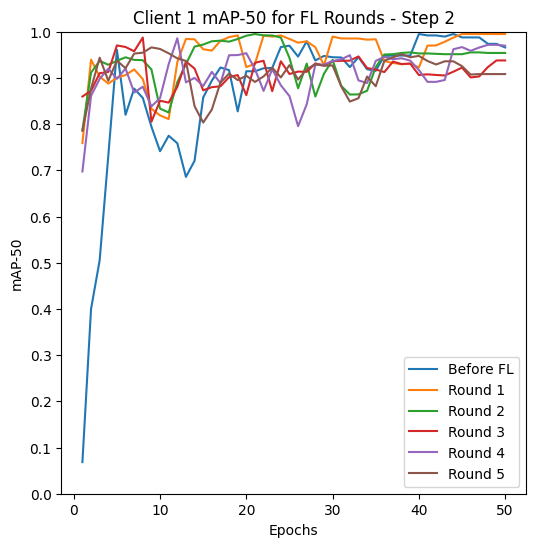

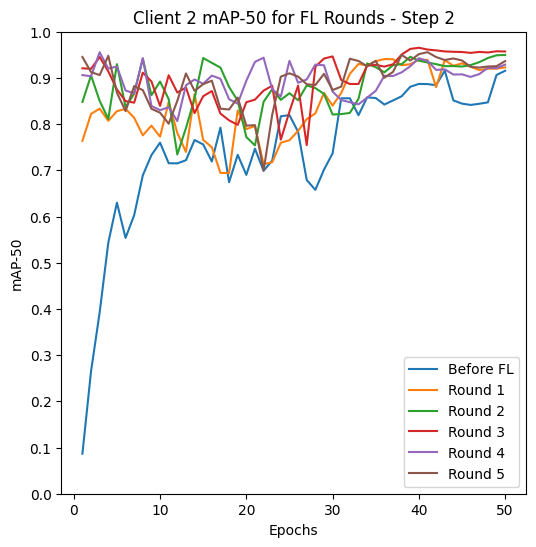

In [72]:
for i in range(1, 3):
    no_fed = pd.read_csv(base_path + f'/runs/detect/round_2_fine_tune_client{i}/results.csv')
    fed_1 = pd.read_csv(base_path + f'/runs/detect/round_2_fed1_fine_tune_client{i}/results.csv')
    fed_2 = pd.read_csv(base_path + f'/runs/detect/round_2_fed12_fine_tune_client{i}/results.csv')
    fed_3 = pd.read_csv(base_path + f'/runs/detect/round_2_fed123_fine_tune_client{i}/results.csv')
    fed_4 = pd.read_csv(base_path + f'/runs/detect/round_2_fed1234_fine_tune_client{i}/results.csv')
    fed_5 = pd.read_csv(base_path + f'/runs/detect/round_2_fed12345_fine_tune_client{i}/results.csv')

    epochs = fed_1['                  epoch']
    map_0 = no_fed['       metrics/mAP50(B)']
    map_1 = fed_1['       metrics/mAP50(B)']
    map_2 = fed_2['       metrics/mAP50(B)']
    map_3 = fed_3['       metrics/mAP50(B)']
    map_4 = fed_4['       metrics/mAP50(B)']
    map_5 = fed_5['       metrics/mAP50(B)']

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, map_0, label='Before FL')
    plt.plot(epochs, map_1, label='Round 1')
    plt.plot(epochs, map_2, label='Round 2')
    plt.plot(epochs, map_3, label='Round 3')
    plt.plot(epochs, map_4, label='Round 4')
    plt.plot(epochs, map_5, label='Round 5')

    plt.title(f'Client {i} mAP-50 for FL Rounds - Step 2')
    plt.xlabel('Epochs')
    plt.ylabel('mAP-50')
    plt.legend(loc='lower right')
    plt.ylim(0, 1)
    plt.yticks([i * 0.1 for i in range(11)])
    # plt.show()
    plt.savefig(base_path + f'/plots/step2_client{i}.jpg')

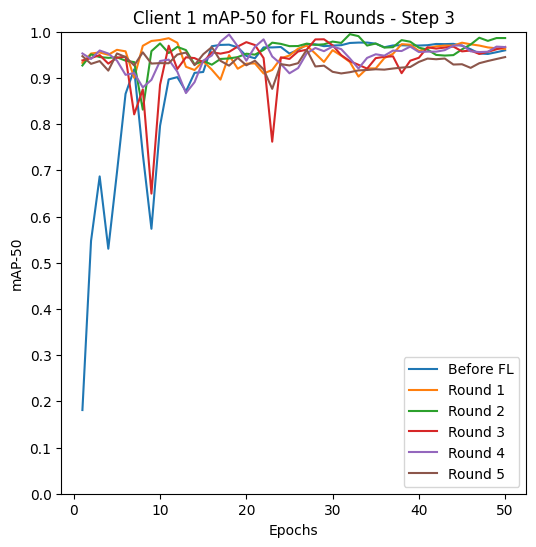

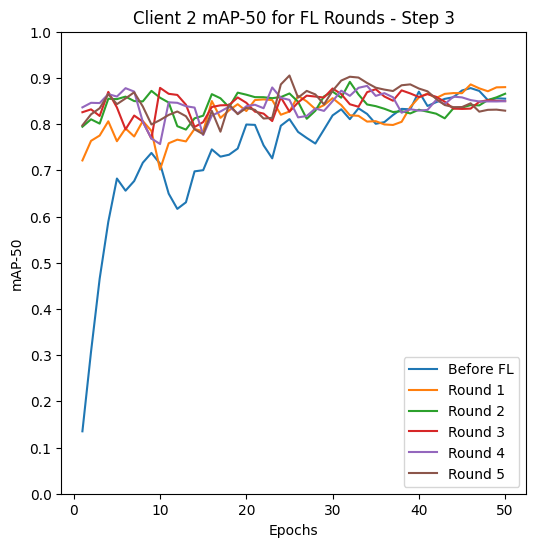

In [74]:
for i in range(1, 3):
    no_fed = pd.read_csv(base_path + f'/runs/detect/round_3_fine_tune_client{i}/results.csv')
    fed_1 = pd.read_csv(base_path + f'/runs/detect/round_3_fed1_fine_tune_client{i}/results.csv')
    fed_2 = pd.read_csv(base_path + f'/runs/detect/round_3_fed12_fine_tune_client{i}/results.csv')
    fed_3 = pd.read_csv(base_path + f'/runs/detect/round_3_fed123_fine_tune_client{i}/results.csv')
    fed_4 = pd.read_csv(base_path + f'/runs/detect/round_3_fed1234_fine_tune_client{i}/results.csv')
    fed_5 = pd.read_csv(base_path + f'/runs/detect/round_3_fed12345_fine_tune_client{i}/results.csv')

    epochs = fed_1['                  epoch']
    map_0 = no_fed['       metrics/mAP50(B)']
    map_1 = fed_1['       metrics/mAP50(B)']
    map_2 = fed_2['       metrics/mAP50(B)']
    map_3 = fed_3['       metrics/mAP50(B)']
    map_4 = fed_4['       metrics/mAP50(B)']
    map_5 = fed_5['       metrics/mAP50(B)']

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, map_0, label='Before FL')
    plt.plot(epochs, map_1, label='Round 1')
    plt.plot(epochs, map_2, label='Round 2')
    plt.plot(epochs, map_3, label='Round 3')
    plt.plot(epochs, map_4, label='Round 4')
    plt.plot(epochs, map_5, label='Round 5')

    plt.title(f'Client {i} mAP-50 for FL Rounds - Step 3')
    plt.xlabel('Epochs')
    plt.ylabel('mAP-50')
    plt.legend(loc='lower right')
    plt.ylim(0, 1)
    plt.yticks([i * 0.1 for i in range(11)])
    # plt.show()
    plt.savefig(base_path + f'/plots/step3_client{i}.jpg')

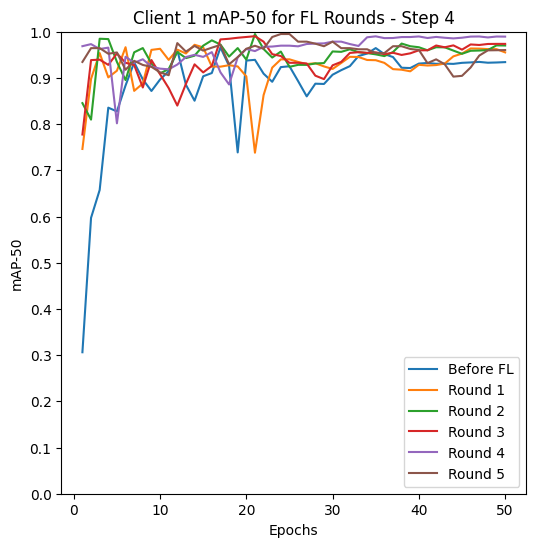

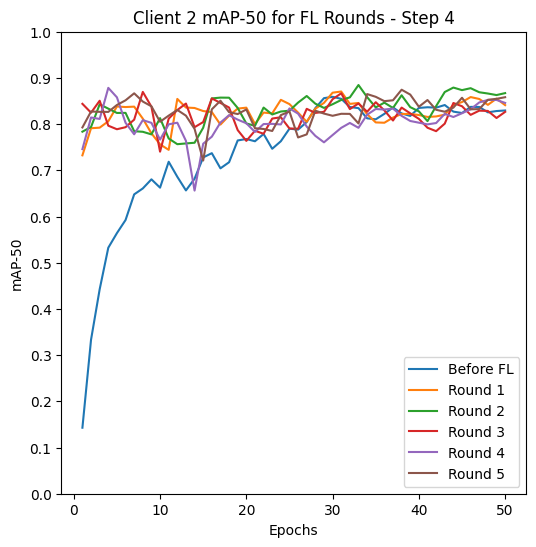

In [76]:
for i in range(1, 3):
    no_fed = pd.read_csv(base_path + f'/runs/detect/round_4_fine_tune_client{i}/results.csv')
    fed_1 = pd.read_csv(base_path + f'/runs/detect/round_4_fed1_fine_tune_client{i}/results.csv')
    fed_2 = pd.read_csv(base_path + f'/runs/detect/round_4_fed12_fine_tune_client{i}/results.csv')
    fed_3 = pd.read_csv(base_path + f'/runs/detect/round_4_fed123_fine_tune_client{i}/results.csv')
    fed_4 = pd.read_csv(base_path + f'/runs/detect/round_4_fed1234_fine_tune_client{i}/results.csv')
    fed_5 = pd.read_csv(base_path + f'/runs/detect/round_4_fed12345_fine_tune_client{i}/results.csv')

    epochs = fed_1['                  epoch']
    map_0 = no_fed['       metrics/mAP50(B)']
    map_1 = fed_1['       metrics/mAP50(B)']
    map_2 = fed_2['       metrics/mAP50(B)']
    map_3 = fed_3['       metrics/mAP50(B)']
    map_4 = fed_4['       metrics/mAP50(B)']
    map_5 = fed_5['       metrics/mAP50(B)']

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, map_0, label='Before FL')
    plt.plot(epochs, map_1, label='Round 1')
    plt.plot(epochs, map_2, label='Round 2')
    plt.plot(epochs, map_3, label='Round 3')
    plt.plot(epochs, map_4, label='Round 4')
    plt.plot(epochs, map_5, label='Round 5')

    plt.title(f'Client {i} mAP-50 for FL Rounds - Step 4')
    plt.xlabel('Epochs')
    plt.ylabel('mAP-50')
    plt.legend(loc='lower right')
    plt.ylim(0, 1)
    plt.yticks([i * 0.1 for i in range(11)])
    # plt.show()
    plt.savefig(base_path + f'/plots/step4_client{i}.jpg')

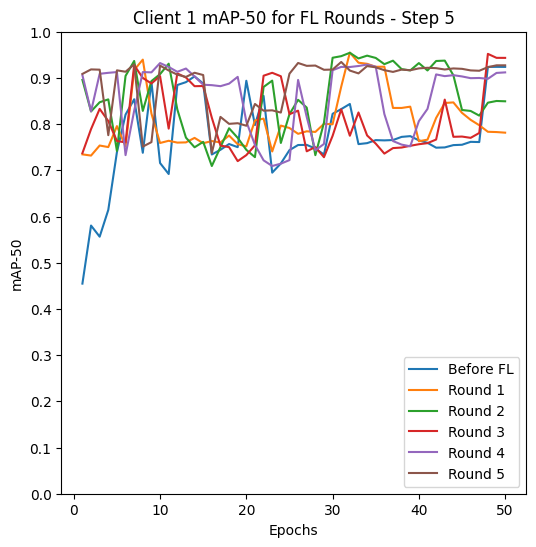

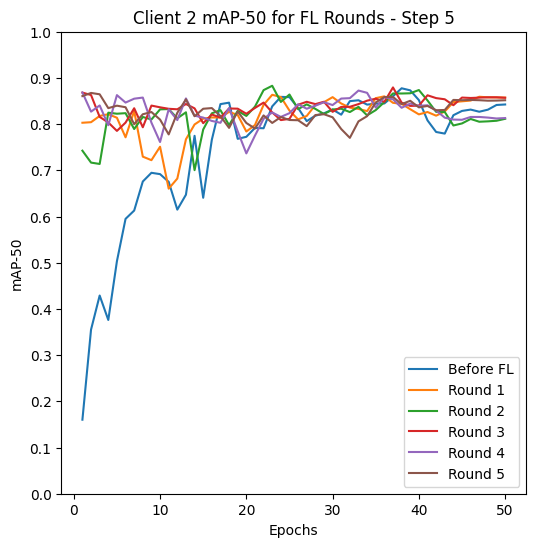

In [77]:
for i in range(1, 3):
    no_fed = pd.read_csv(base_path + f'/runs/detect/round_5_fine_tune_client{i}/results.csv')
    fed_1 = pd.read_csv(base_path + f'/runs/detect/round_5_fed1_fine_tune_client{i}/results.csv')
    fed_2 = pd.read_csv(base_path + f'/runs/detect/round_5_fed12_fine_tune_client{i}/results.csv')
    fed_3 = pd.read_csv(base_path + f'/runs/detect/round_5_fed123_fine_tune_client{i}/results.csv')
    fed_4 = pd.read_csv(base_path + f'/runs/detect/round_5_fed1234_fine_tune_client{i}/results.csv')
    fed_5 = pd.read_csv(base_path + f'/runs/detect/round_5_fed12345_fine_tune_client{i}/results.csv')

    epochs = fed_1['                  epoch']
    map_0 = no_fed['       metrics/mAP50(B)']
    map_1 = fed_1['       metrics/mAP50(B)']
    map_2 = fed_2['       metrics/mAP50(B)']
    map_3 = fed_3['       metrics/mAP50(B)']
    map_4 = fed_4['       metrics/mAP50(B)']
    map_5 = fed_5['       metrics/mAP50(B)']

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, map_0, label='Before FL')
    plt.plot(epochs, map_1, label='Round 1')
    plt.plot(epochs, map_2, label='Round 2')
    plt.plot(epochs, map_3, label='Round 3')
    plt.plot(epochs, map_4, label='Round 4')
    plt.plot(epochs, map_5, label='Round 5')

    plt.title(f'Client {i} mAP-50 for FL Rounds - Step 5')
    plt.xlabel('Epochs')
    plt.ylabel('mAP-50')
    plt.legend(loc='lower right')
    plt.ylim(0, 1)
    plt.yticks([i * 0.1 for i in range(11)])
    # plt.show()
    plt.savefig(base_path + f'/plots/step5_client{i}.jpg')

In [33]:
for i in range(1, 6):
    server = []
    client1 = []
    client2 = []
    if i == 1:
        server = pd.read_csv(base_path + f'/runs/detect/init/results.csv')
        client1 = pd.read_csv(base_path + f'/runs/detect/init_fine_tune_client1/results.csv')
        client2 = pd.read_csv(base_path + f'/runs/detect/init_fine_tune_client2/results.csv')
    else:
        server = pd.read_csv(base_path + f'/runs/detect/round_{i}/results.csv')
        client1 = pd.read_csv(base_path + f'/runs/detect/round_{i}_fine_tune_client1/results.csv')
        client2 = pd.read_csv(base_path + f'/runs/detect/round_{i}_fine_tune_client2/results.csv')
    # server['      metrics/recall(B)']    
    map_0 = server['      metrics/recall(B)'].iloc[-1]
    map_1 = client1['      metrics/recall(B)'].iloc[-1]
    map_2 = client2['      metrics/recall(B)'].iloc[-1]
    print(map_0, map_1, map_2)

0.95455 1.0 0.83333
0.89333 0.94228 0.82214
0.88149 0.9188 0.82376
0.98263 0.89206 0.83085
0.96117 0.9024 0.83625


In [39]:
for i in range(1, 3):
    no_fed = pd.read_csv(base_path + f'/runs/detect/round_5_fine_tune_client{i}/results.csv')
    fed_1 = pd.read_csv(base_path + f'/runs/detect/round_5_fed1_fine_tune_client{i}/results.csv')
    fed_2 = pd.read_csv(base_path + f'/runs/detect/round_5_fed12_fine_tune_client{i}/results.csv')
    fed_3 = pd.read_csv(base_path + f'/runs/detect/round_5_fed123_fine_tune_client{i}/results.csv')
    fed_4 = pd.read_csv(base_path + f'/runs/detect/round_5_fed1234_fine_tune_client{i}/results.csv')
    fed_5 = pd.read_csv(base_path + f'/runs/detect/round_5_fed12345_fine_tune_client{i}/results.csv')
    
    print(f'Client {i}')
    print(f'Precision: {no_fed['   metrics/precision(B)'].iloc[-1]}, Recall: {no_fed['      metrics/recall(B)'].iloc[-1]}, mAP50: {no_fed["       metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_1['   metrics/precision(B)'].iloc[-1]}, Recall: {fed_1['      metrics/recall(B)'].iloc[-1]}, mAP50: {fed_1["       metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_2['   metrics/precision(B)'].iloc[-1]}, Recall: {fed_2['      metrics/recall(B)'].iloc[-1]}, mAP50: {fed_2["       metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_3['   metrics/precision(B)'].iloc[-1]}, Recall: {fed_3['      metrics/recall(B)'].iloc[-1]}, mAP50: {fed_3["       metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_4['   metrics/precision(B)'].iloc[-1]}, Recall: {fed_4['      metrics/recall(B)'].iloc[-1]}, mAP50: {fed_4["       metrics/mAP50(B)"].iloc[-1]}')
    print(f'Precision: {fed_5['   metrics/precision(B)'].iloc[-1]}, Recall: {fed_5['      metrics/recall(B)'].iloc[-1]}, mAP50: {fed_5["       metrics/mAP50(B)"].iloc[-1]}')

Client 1
Precision: 0.95504, Recall: 0.9024, mAP50: 0.92386
Precision: 0.80974, Recall: 0.73426, mAP50: 0.7815
Precision: 0.81683, Recall: 0.88153, mAP50: 0.84942
Precision: 0.9616, Recall: 0.87831, mAP50: 0.94338
Precision: 0.90639, Recall: 0.87152, mAP50: 0.91198
Precision: 0.96461, Recall: 0.88143, mAP50: 0.92728
Client 2
Precision: 0.83495, Recall: 0.83625, mAP50: 0.84251
Precision: 0.80841, Recall: 0.8428, mAP50: 0.85745
Precision: 0.74388, Recall: 0.82728, mAP50: 0.81149
Precision: 0.87205, Recall: 0.85104, mAP50: 0.85704
Precision: 0.82316, Recall: 0.76356, mAP50: 0.81312
Precision: 0.86992, Recall: 0.85877, mAP50: 0.85167


# mAP50 Distribution - Incremental Learning

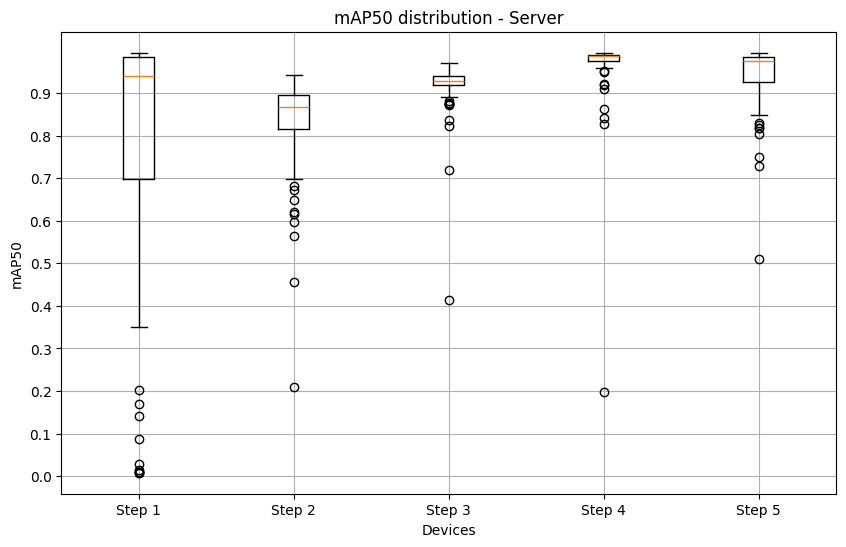

In [35]:
round_1 = pd.read_csv(base_path + '/runs/detect/init/results.csv')
round_2 = pd.read_csv(base_path + '/runs/detect/round_2/results.csv')
round_3 = pd.read_csv(base_path + '/runs/detect/round_3/results.csv')
round_4 = pd.read_csv(base_path + '/runs/detect/round_4/results.csv')
round_5 = pd.read_csv(base_path + '/runs/detect/round_5/results.csv')
mAP50 = [
    round_1['       metrics/mAP50(B)'],  # Group 1
    round_2['       metrics/mAP50(B)'],  # Group 2
    round_3['       metrics/mAP50(B)'],
    round_4['       metrics/mAP50(B)'],
    round_5['       metrics/mAP50(B)'],# Group 3
]

# precision = [
#     [0.9936, 0.9677, 0.9174, 0.9559, 0.9420],
#     [0.9234, 0.9521, 0.9691, 0.9379, 0.9550],
#     [0.8596, 0.9122, 0.8279, 0.8080, 0.8349]
# ]

# recall = [
#     [0.9545, 0.8933, 0.8814, 0.9926, 0.9611],
#     [1.0000, 0.9422, 0.9188, 0.8920, 0.9024],
#     [0.8333, 0.8221, 0.8237, 0.8308, 0.8362]
# ]

data = mAP50
plt.figure(figsize=(10, 6))
plt.boxplot(data, widths=0.2, tick_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5'])
plt.title('mAP50 distribution - Server')
plt.xlabel('Devices')
plt.ylabel('mAP50')
plt.grid(True)
plt.yticks(ticks=[i * 0.1 for i in range(10)])
plt.show()

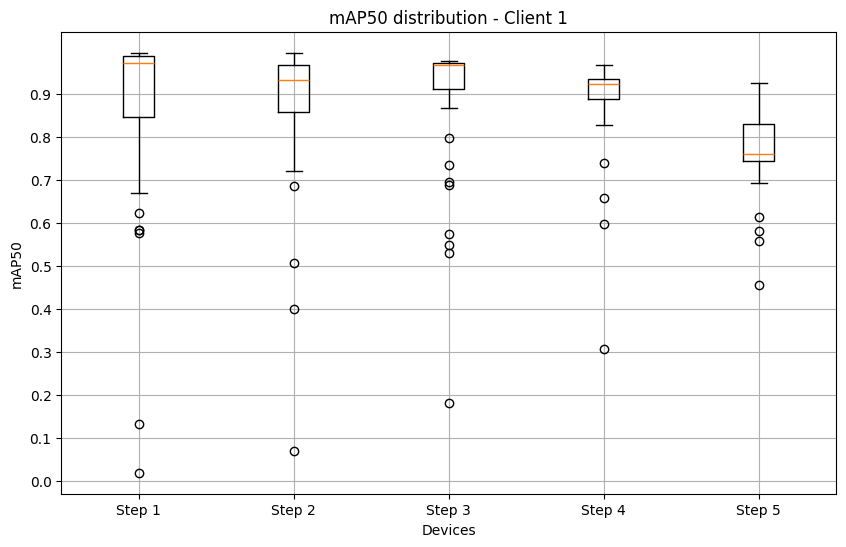

In [34]:
round_1 = pd.read_csv(base_path + '/runs/detect/init_fine_tune_client1/results.csv')
round_2 = pd.read_csv(base_path + '/runs/detect/round_2_fine_tune_client1/results.csv')
round_3 = pd.read_csv(base_path + '/runs/detect/round_3_fine_tune_client1/results.csv')
round_4 = pd.read_csv(base_path + '/runs/detect/round_4_fine_tune_client1/results.csv')
round_5 = pd.read_csv(base_path + '/runs/detect/round_5_fine_tune_client1/results.csv')
mAP50 = [
    round_1['       metrics/mAP50(B)'],  # Group 1
    round_2['       metrics/mAP50(B)'],  # Group 2
    round_3['       metrics/mAP50(B)'],
    round_4['       metrics/mAP50(B)'],
    round_5['       metrics/mAP50(B)'],# Group 3
]

# precision = [
#     [0.9936, 0.9677, 0.9174, 0.9559, 0.9420],
#     [0.9234, 0.9521, 0.9691, 0.9379, 0.9550],
#     [0.8596, 0.9122, 0.8279, 0.8080, 0.8349]
# ]

# recall = [
#     [0.9545, 0.8933, 0.8814, 0.9926, 0.9611],
#     [1.0000, 0.9422, 0.9188, 0.8920, 0.9024],
#     [0.8333, 0.8221, 0.8237, 0.8308, 0.8362]
# ]

data = mAP50
plt.figure(figsize=(10, 6))
plt.boxplot(data, widths=0.2, tick_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5'])
plt.title('mAP50 distribution - Client 1')
plt.xlabel('Devices')
plt.ylabel('mAP50')
plt.grid(True)
plt.yticks(ticks=[i * 0.1 for i in range(10)])
plt.show()

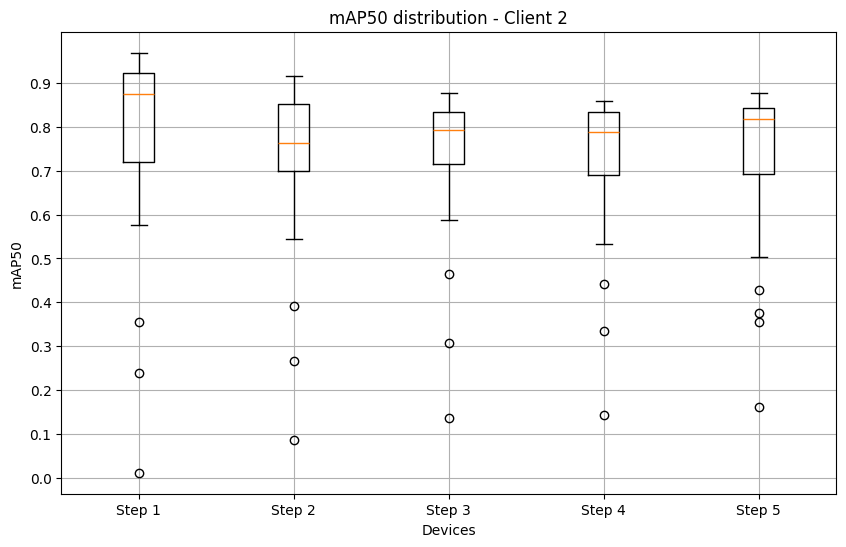

In [33]:
round_1 = pd.read_csv(base_path + '/runs/detect/init_fine_tune_client2/results.csv')
round_2 = pd.read_csv(base_path + '/runs/detect/round_2_fine_tune_client2/results.csv')
round_3 = pd.read_csv(base_path + '/runs/detect/round_3_fine_tune_client2/results.csv')
round_4 = pd.read_csv(base_path + '/runs/detect/round_4_fine_tune_client2/results.csv')
round_5 = pd.read_csv(base_path + '/runs/detect/round_5_fine_tune_client2/results.csv')
mAP50 = [
    round_1['       metrics/mAP50(B)'],  # Group 1
    round_2['       metrics/mAP50(B)'],  # Group 2
    round_3['       metrics/mAP50(B)'],
    round_4['       metrics/mAP50(B)'],
    round_5['       metrics/mAP50(B)'],# Group 3
]

# precision = [
#     [0.9936, 0.9677, 0.9174, 0.9559, 0.9420],
#     [0.9234, 0.9521, 0.9691, 0.9379, 0.9550],
#     [0.8596, 0.9122, 0.8279, 0.8080, 0.8349]
# ]

# recall = [
#     [0.9545, 0.8933, 0.8814, 0.9926, 0.9611],
#     [1.0000, 0.9422, 0.9188, 0.8920, 0.9024],
#     [0.8333, 0.8221, 0.8237, 0.8308, 0.8362]
# ]

data = mAP50
plt.figure(figsize=(10, 6))
plt.boxplot(data, widths=0.2, tick_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5'])
plt.title('mAP50 distribution - Client 2')
plt.xlabel('Devices')
plt.ylabel('mAP50')
plt.grid(True)
plt.yticks(ticks=[i * 0.1 for i in range(10)])
plt.show()

In [59]:
# Calculate the median for each group
medians = [np.median(group) for group in data]

# Print the medians
for i, median in enumerate(medians, start=1):
    print(f'Median of Group {i}: {median:.4f}')

Median of Group 1: 0.9572
Median of Group 2: 0.9597
Median of Group 3: 0.8550


In [ ]:
import numpy as np 

client1 = [0.99125, 0.90832, 0.94512, 0.96031, 0.96461]
client2 = [0.93352, 0.93641, 0.8291, 0.85825, 0.86992]

print(np.mean(client1), np.mean(client2))